# 生成数组的函数

## arange

`arange` 类似于**Python**中的 `range` 函数，只不过返回的不是列表，而是数组：

    arange(start, stop=None, step=1, dtype=None)

产生一个在区间 `[start, stop)` 之间，以 `step` 为间隔的数组，如果只输入一个参数，则默认从 `0` 开始，并以这个值为结束：

In [2]:
import numpy as np
np.arange(4)

array([0, 1, 2, 3])

与 `range` 不同， `arange` 允许非整数值输入，产生一个非整型的数组：

In [6]:
# cc
type(range(4)) # 这里返回的也不是列表，应该是个迭代器（可迭代对象）

range

In [2]:
np.arange(0, 2 * np.pi, np.pi / 4)

# 参数：start, stop, step

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

数组的类型默认由参数 `start, stop, step` 来确定，同时还可以指定dtype类型：

In [3]:
np.arange(0, 2 * np.pi, np.pi / 4, dtype=np.float32)

array([ 0.        ,  0.78539819,  1.57079637,  2.3561945 ,  3.14159274,
        3.92699099,  4.71238899,  5.49778748], dtype=float32)

In [6]:
# cc
np.arange(0, 2 * np.pi, np.pi / 4).dtype # 默认是float64

dtype('float64')

由于存在精度问题，使用浮点数可能出现问题：

In [4]:
np.arange(1.5, 2.1, 0.3)

array([ 1.5,  1.8,  2.1])

`stop` 的值 `2.1` 出现在了数组中，所以使用浮点数的时候需要注意。

## linspace

    linspace(start, stop, N)

产生 `N` 个等距分布在 `[start, stop]`间的元素组成的数组，包括 `start, stop`。

In [5]:
np.linspace(0, 1, 5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

## logspace

    logspace(start, stop, N)

产生 N 个对数等距分布的数组，默认以10为底：

In [6]:
np.logspace(0, 1, 5)

array([  1.        ,   1.77827941,   3.16227766,   5.62341325,  10.        ])

产生的值为$\left[10^0, 10^{0.25},10^{0.5},10^{0.75},10^1\right]$。

更多参数参考文档：https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

## meshgrid

有时候需要在二维平面中生成一个网格，这时候可以使用 `meshgrid` 来完成这样的工作：

In [7]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

x, y = np.meshgrid(x_ticks, y_ticks)

In [8]:
x_ticks

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [9]:
y_ticks

array([-1. , -0.5,  0. ,  0.5,  1. ])

这里产生的 `x, y`如下：

In [8]:
x

array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-1. , -0.5,  0. ,  0.5,  1. ]])

In [9]:
y

array([[-1. , -1. , -1. , -1. , -1. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

`x` 对应网格的第一维，`y` 对应网格的第二维。

图例：

<ipython-input-8-6955d83e9edb>:9: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

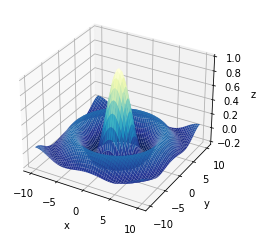

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def f(x, y):
    # sinc 函数
    r = np.sqrt(x ** 2 + y ** 2)
    result = np.sin(r) / r
    result[r == 0] = 1.0
    return result

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks) # cc：通过这种方式画坐标轴还是很方便的。

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

事实上，`x, y` 中有很多冗余的元素，这里提供了一个 `sparse` 的选项： 

In [14]:
# cc，这个是还没有用sparse 参数的输出，可以看到有很多重复的冗余数据
x

array([[-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ],
       [-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ],
       [-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ],
       ...,
       [-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ],
       [-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ],
       [-10. ,  -9.6,  -9.2, ...,   9.2,   9.6,  10. ]])

In [11]:
x_ticks = np.linspace(-1, 1, 5)
y_ticks = np.linspace(-1, 1, 5)

# 加入了sparse参数
x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

In [12]:
x 
# cc：这里用了sparse参数

array([[-1. , -0.5,  0. ,  0.5,  1. ]])

In [13]:
y

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ]])

在这个选项下，`x, y` 变成了单一的行向量和列向量。

但这并不影响结果：

<ipython-input-11-ad196c15e056>:9: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

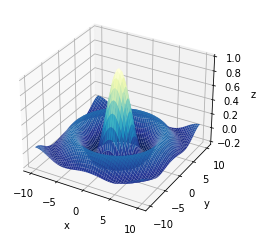

In [17]:
x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [18]:
z
# cc:这里打印出z，可以看到是二维的。
# 下面的尝试了一下让z直接等于f(x_ticks, y_ticks)，也就是变成了1维，导致画图报错。
# 所以 meshgrid 的方法，理解下来就是生成了二维网格；

array([[0.07070981, 0.06942837, 0.06278079, ..., 0.06278079, 0.06942837,
        0.07070981],
       [0.06942837, 0.06237817, 0.05016709, ..., 0.05016709, 0.06237817,
        0.06942837],
       [0.06278079, 0.05016709, 0.03304271, ..., 0.03304271, 0.05016709,
        0.06278079],
       ...,
       [0.06278079, 0.05016709, 0.03304271, ..., 0.03304271, 0.05016709,
        0.06278079],
       [0.06942837, 0.06237817, 0.05016709, ..., 0.05016709, 0.06237817,
        0.06942837],
       [0.07070981, 0.06942837, 0.06278079, ..., 0.06278079, 0.06942837,
        0.07070981]])

<ipython-input-8-6955d83e9edb>:9: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


ValueError: Argument Z must be 2-dimensional.

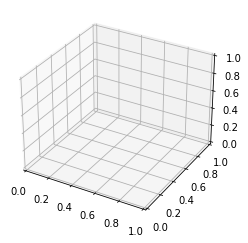

In [9]:
# cc：如果不用 meshgrid 会怎么样？
# 这里就报错了，因为这样算出来的z就为一维，但实际上z要求是二维的！Argument Z must be 2-dimensional.

x_ticks = np.linspace(-10, 10, 51)
y_ticks = np.linspace(-10, 10, 51)

x, y = np.meshgrid(x_ticks, y_ticks, sparse=True)

z = f(x_ticks, y_ticks)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [16]:
z

array([ 0.07070981,  0.06237817,  0.03304271, -0.00972224, -0.05338678,
       -0.08395308, -0.09020406, -0.06748456, -0.01983009,  0.04034553,
        0.09513663,  0.12599736,  0.11933086,  0.0712767 , -0.00974015,
       -0.10362229, -0.18249572, -0.21712243, -0.18433271, -0.07361121,
        0.10891981,  0.3402979 ,  0.58456506,  0.79991121,  0.94751353,
        1.        ,  0.94751353,  0.79991121,  0.58456506,  0.3402979 ,
        0.10891981, -0.07361121, -0.18433271, -0.21712243, -0.18249572,
       -0.10362229, -0.00974015,  0.0712767 ,  0.11933086,  0.12599736,
        0.09513663,  0.04034553, -0.01983009, -0.06748456, -0.09020406,
       -0.08395308, -0.05338678, -0.00972224,  0.03304271,  0.06237817,
        0.07070981])

`meshgrid` 可以设置轴排列的先后顺序：
- 默认为 `indexing='xy'` 即笛卡尔坐标，对于2维数组，返回行向量 `x` 和列向量 `y`
- 或者使用 `indexing='ij'` 即矩阵坐标，对于2维数组，返回列向量 `x` 和行向量 `y`。

## ogrid , mgrid

**Matlab**中有 `meshgrid` 的用法：

    meshgrid(-1:.5:1, -1:.5:1)

**Numpy**的 `meshgrid` 并不支持这样的用法，但我们可以使用 `ogrid / mgrid` 来实现类似这样的用法。

`ogrid` 与 `mgrid` 的区别在于：
- `ogrid` 相当于 `meshgrid(indexing='ij', sparse=True)`
- `mgrid` 相当于 `meshgrid(indexing='ij', sparse=False)`

In [15]:
x, y = np.ogrid[-1:1:.5, -1:1:.5]

In [16]:
x

array([[-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5]])

In [17]:
y

array([[-1. , -0.5,  0. ,  0.5]])

注意：
- 这里使用的是中括号
- **Matlab** 使用的是 `start:step:end` 的表示，**Numpy** 使用的是 `start:end:step` 的表示
- 这里的结果不包括 `end` 的值

为了包含 `end` 的值，我们可以使用这样的技巧：

In [18]:
x, y = np.ogrid[-1:1:5j, -1:1:5j]

In [19]:
x, y

(array([[-1. ],
        [-0.5],
        [ 0. ],
        [ 0.5],
        [ 1. ]]), array([[-1. , -0.5,  0. ,  0.5,  1. ]]))

我们在 `step` 的位置传入一个复数 `5j` ，表示我们需要一个 `5` 个值的数组，此时返回值就会包含 `end` 的值。

重复之前的画图：

c:\Miniconda\lib\site-packages\IPython\kernel\__main__.py:9: RuntimeWarning: invalid value encountered in divide


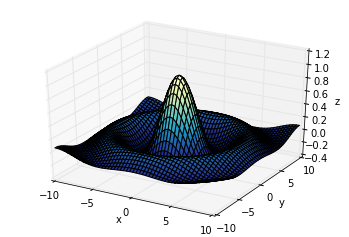

In [20]:
# exchange here
y, x = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

<ipython-input-8-6955d83e9edb>:9: RuntimeWarning: invalid value encountered in true_divide
  result = np.sin(r) / r


Text(0.5, 0, 'z')

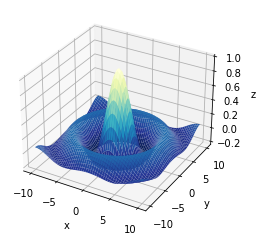

In [10]:
# cc：其实x，y值都一样，所以交不交换顺序也就都一样。只是x，y的shape会与之前的不同。
x, y = np.ogrid[-10:10:51j, -10:10:51j]

z = f(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,
                rstride=1, cstride=1,
                cmap=cm.YlGnBu_r)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

这里，我们交换了 `x, y` 输出值的顺序。

## r`_` , c`_`

我们可以使用 `r_ / c_` 来产生行向量或者列向量。

使用切片产生：

In [21]:
np.r_[0:1:.1]

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

复数步长制定数组长度：

In [22]:
np.r_[0:1:5j]

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

连接多个序列，产生数组：

In [23]:
np.r_[(3,22,11), 4.0, [15, 6]]

array([  3.,  22.,  11.,   4.,  15.,   6.])

列向量：

In [24]:
np.c_[1:3:5j]

# cc：这两个方法倒是简单很多。

array([[ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ]])

## ones , zeros

```python
ones(shape, dtype=float64)
zeros(shape, dtype=float64)
```

产生一个制定形状的全 `0` 或全 `1` 的数组，还可以制定数组类型：

In [25]:
np.zeros(3)

array([ 0.,  0.,  0.])

In [26]:
np.ones([2,3], dtype=np.float32)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32)

产生一个全是 `5` 的数组：

In [27]:
np.ones([2,3]) * 5

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

## empty

    empty(shape, dtype=float64, order='C')

也可以使用 `empty` 方法产生一个制定大小的数组（数组所指向的内存未被初始化，所以值随机），再用 `fill` 方法填充：

In [13]:
a = np.empty(2)
a

array([inf, inf])

In [14]:
a.fill(5)
a

array([5., 5.])

另一种替代方法使用索引，不过速度会稍微慢一些：

In [30]:
a[:] = 5
a

array([ 5.,  5.])

## empty`_`like, ones`_`like, zeros`_`like

    empty_like(a)
    ones_like(a)
    zeros_like(a)

产生一个跟 `a` 大小一样，类型一样的对应数组。

In [21]:
a = np.arange(0, 10, 2.5)
a

array([0. , 2.5, 5. , 7.5])

In [26]:
np.empty_like(a)
# cc：但其实也不是empty

array([0. , 2.5, 5. , 7.5])

In [17]:
np.zeros_like(a)

array([0., 0., 0., 0.])

In [18]:
np.ones_like(a)

array([1., 1., 1., 1.])

## identity

    indentity(n, dtype=float64)
产生一个 `n` 乘 `n` 的单位矩阵：

In [35]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])